$\textbf{Importing packages}$

In [61]:
#importing packages
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
from sklearn import linear_model
import matplotlib.pyplot as plt


 $\textbf{Reading Excel file saved in hard drive}$

In [62]:
#reading the file
df = pd.read_excel("share.xlsx")
df


,OBS,PRICE
0,1,975.04
1,2,977.07
2,3,966.58
3,4,964.00
4,5,956.05
...,...,...
989,990,1144.80
990,991,1170.35
991,992,1167.10
992,993,1158.31


$\textbf{Calculating daily returns and daily squared returns from SP500}$

Daily returns (R)
    $$R = 100*ln(P_t/P_{t-1})$$
    
Daily squared returns ($R^{2}$)
   $$R = R^{2}$$

In [63]:
#computing the inflation rate
df['R'] = 100*np.log(df['PRICE']/df['PRICE'].shift(1))
df['R_squared'] = df['R']**2
df = df.dropna(subset=["R"])
df

,OBS,PRICE,R,R_squared
1,2,977.07,0.207980,0.043256
2,3,966.58,-1.079423,1.165154
3,4,964.00,-0.267277,0.071437
4,5,956.05,-0.828108,0.685763
5,6,927.69,-3.011259,9.067679
...,...,...,...,...
989,990,1144.80,1.310082,1.716314
990,991,1170.35,2.207290,4.872129
991,992,1167.10,-0.278081,0.077329
992,993,1158.31,-0.755999,0.571535


$\textbf{Plotting the time series: R and $R^2$}$

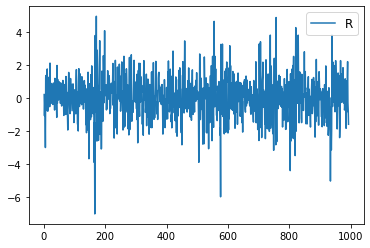

In [64]:
#plotting the R series
plt.plot(df['R'],label='R')
plt.legend(loc='best', fontsize='large')
plt.show()

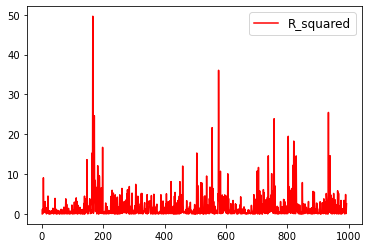

In [65]:
#plotting the R_squared series
plt.plot(df['R_squared'],label='R_squared',color='Red')
plt.legend(loc='best', fontsize='large')
plt.show()

$\textbf{Histogram and descriptive statistics}$

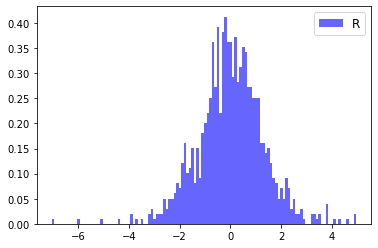

In [66]:
#Plot histogram of R
plt.hist(df['R'],bins=120,label='R', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [67]:
from scipy import stats
stats.describe(df['R'])

DescribeResult(nobs=993, minmax=(-7.043759037302043, 4.964596183505854), mean=0.01573450555862576, variance=1.694877827267905, skewness=-0.1468232170367387, kurtosis=2.016094075647234)

In [68]:
stats.jarque_bera(df['R'])

Jarque_beraResult(statistic=171.7419793855507, pvalue=0.0)

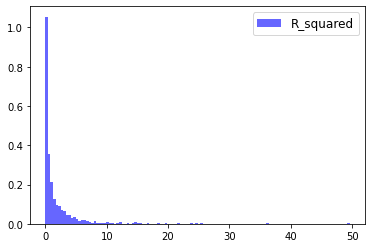

In [69]:
#Plot histogram of R_squared
plt.hist(df['R_squared'],bins=120,label='R_squared', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [70]:
stats.describe(df['R_squared'])

DescribeResult(nobs=993, minmax=(0.0, 49.614541375574206), mean=1.693418576326566, variance=11.506356201573688, skewness=6.16939777089506, kurtosis=59.64692480452559)

In [71]:
stats.jarque_bera(df['R_squared'])

Jarque_beraResult(statistic=153501.31264418407, pvalue=0.0)

$\textbf{ACF , PACF of R}$

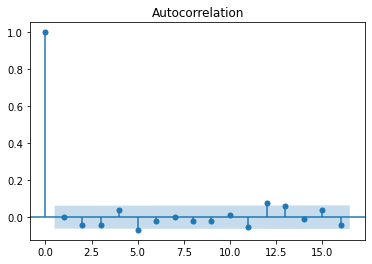

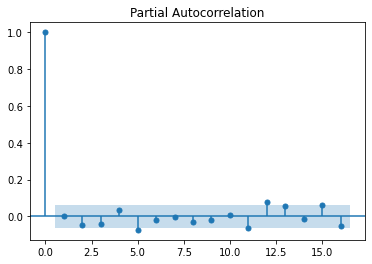

In [72]:
from statsmodels.graphics import tsaplots
fig =tsaplots.plot_acf(df['R'],lags=16)
fig =tsaplots.plot_pacf(df['R'],lags=16)
plt.show()

In [73]:
# Generating the Q tables
import numpy as np
r,q,p = sm.tsa.acf(df['R'].values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC          Q  Prob(>Q)
lag                                
1.0   0.002187   0.004765  0.944967
2.0  -0.044549   1.983469  0.370933
3.0  -0.042759   3.808159  0.282939
4.0   0.036575   5.144571  0.272783
5.0  -0.068961   9.900359  0.078108
6.0  -0.019748  10.290740  0.112930
7.0  -0.001411  10.292735  0.172582
8.0  -0.019274  10.665353  0.221391
9.0  -0.019877  11.062067  0.271479
10.0  0.014334  11.268578  0.336980
11.0 -0.054077  14.210889  0.221543
12.0  0.077208  20.214671  0.063133
13.0  0.059358  23.766889  0.033343
14.0 -0.008254  23.835639  0.047960
15.0  0.039619  25.421426  0.044562
16.0 -0.040201  27.055817  0.040867
17.0  0.014268  27.261915  0.054337
18.0 -0.057071  30.562506  0.032324
19.0  0.021465  31.029898  0.040069
20.0 -0.010472  31.141257  0.053353
21.0 -0.054597  34.171259  0.034738
22.0 -0.015008  34.400460  0.044705
23.0  0.028022  35.200283  0.049681
24.0  0.036951  36.592496  0.048029
25.0 -0.033563  37.742296  0.049009
26.0  0.017079  38.040350  0

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


$\textbf{ACF , PACF of $R^2$}$

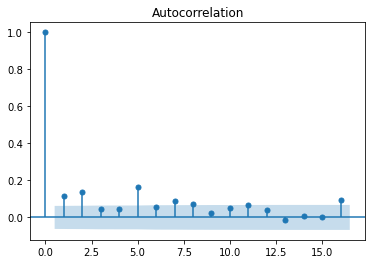

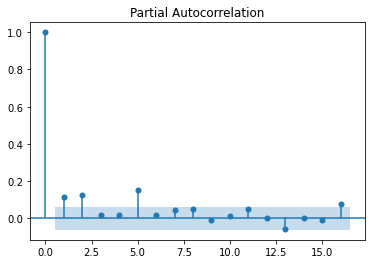

In [74]:
fig =tsaplots.plot_acf(df['R_squared'],lags=16)
fig =tsaplots.plot_pacf(df['R_squared'],lags=16)
plt.show()

In [75]:
# Generating the Q tables
import numpy as np
r,q,p = sm.tsa.acf(df['R_squared'].values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print (table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0   0.116401   13.495026  2.391966e-04
2.0   0.137366   32.307886  9.647874e-08
3.0   0.045022   34.330823  1.686854e-07
4.0   0.043314   36.205092  2.625763e-07
5.0   0.163064   62.795866  3.208813e-12
6.0   0.055033   65.827678  2.922824e-12
7.0   0.088429   73.663464  2.678057e-13
8.0   0.072519   78.938732  7.992968e-14
9.0   0.026248   79.630526  1.913609e-13
10.0  0.051198   82.265203  1.803486e-13
11.0  0.065028   86.519895  7.988149e-14
12.0  0.041676   88.269223  1.067025e-13
13.0 -0.014482   88.480668  2.726470e-13
14.0  0.010197   88.585610  7.015944e-13
15.0  0.001769   88.588769  1.817136e-12
16.0  0.091960   97.140862  1.186384e-13
17.0  0.036990   98.525997  1.667347e-13
18.0  0.072813  103.898575  4.253523e-14
19.0  0.076362  109.813725  8.627403e-15
20.0  0.020351  110.234269  1.780030e-14
21.0  0.110912  122.738581  2.240937e-16
22.0  0.050038  125.286355  1.894182e-16
23.0 -0.001192  

C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\rluck\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


$\textbf{ARCH(5)}$

In [76]:
from arch import arch_model

In [77]:
dt = df['R']
model = arch_model(dt,mean ='Constant', vol ='ARCH', q=5)
x_5 =model.fit(update_freq=0)
x_5

Optimization terminated successfully    (Exit mode 0)
            Current function value: 1664.047869085027
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5


                      Constant Mean - ARCH Model Results                      
Dep. Variable:                      R   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -1664.05
Distribution:                  Normal   AIC:                           3334.10
Method:            Maximum Likelihood   BIC:                           3348.80
                                        No. Observations:                  993
Date:                Thu, Jul 22 2021   Df Residuals:                      992
Time:                        20:04:12   Df Model:                            1
                                 Mean Model                                
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
mu             0.0293  4.132e-02      0.709      0.478 [-5.17

In [78]:
#Aligning AIC, BIC from Python with Stata's AIC, BIC
n =993
name = ['AIC_stata','BIC_stata']
stata=[x_5.aic/n,x_5.bic/n]
lzip(name, stata)

[('AIC_stata', 3.357598930684848), ('BIC_stata', 3.3724047635067365)]

$\textbf{ARCH Test}$

In [79]:
from statsmodels.stats.diagnostic import het_arch
from statsmodels.compat import lzip
res = het_arch(dt.values, nlags=5)
name =['lm','lm_pval','fval','f_pval']
lzip(name,res)

[('lm', 52.586810853630816),
 ('lm_pval', 4.0887029149590036e-10),
 ('fval', 11.041163168843253),
 ('f_pval', 2.3131694315533897e-10)]

$\textbf{ARCH Test of Standardised Residuals}$

In [80]:
std_resid = x_5.resid/x_5.conditional_volatility
res = het_arch(std_resid, nlags=5)
name =['lm','lm_pval','fval','f_pval']
lzip(name,res)

[('lm', 44.61654794255047),
 ('lm_pval', 1.7360584950680533e-08),
 ('fval', 9.2885771918154),
 ('f_pval', 1.1768118600559285e-08)]

$\textbf{Histogram of Residuals}$

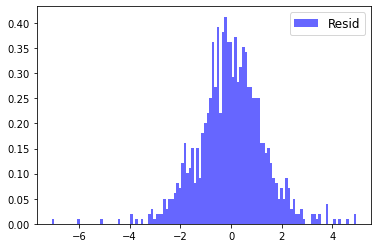

In [81]:
#Historgram of residuals
resid = x_5.resid
plt.hist(resid,bins=120,label='Resid', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [82]:
stats.describe(resid)

DescribeResult(nobs=993, minmax=(-7.073049296466991, 4.9353059243409065), mean=-0.013555753606322416, variance=1.694877827267905, skewness=-0.1468232170367387, kurtosis=2.016094075647234)

In [83]:
stats.jarque_bera(resid)

Jarque_beraResult(statistic=171.7419793855507, pvalue=0.0)

$\textbf{ACF , PACF of Squared Residuals}$

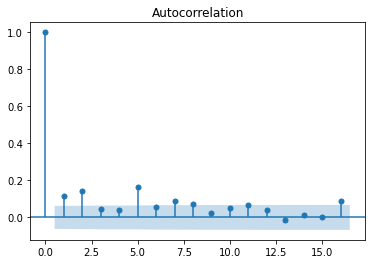

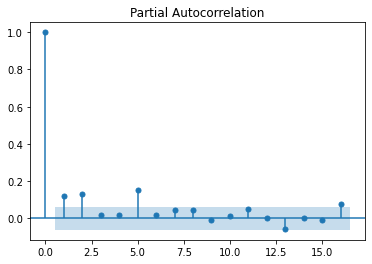

In [84]:
fig =tsaplots.plot_acf(resid**2,lags=16)
fig =tsaplots.plot_pacf(resid**2,lags=16)
plt.show()

$\textbf{Histogram of Standardised Residuals}$

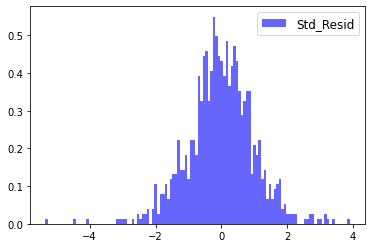

In [85]:
#Historgram of std residuals
plt.hist(std_resid,bins=120,label='Std_Resid', density=True, alpha=0.6, color='b')
plt.legend(loc='best', fontsize='large')
plt.show()

In [86]:
stats.describe(std_resid)

DescribeResult(nobs=993, minmax=(-5.343797790419605, 3.8965888804733484), mean=-0.014086543542439298, variance=1.0008098057706427, skewness=-0.17614610401990488, kurtosis=1.8124982770599578)

In [87]:
stats.jarque_bera(std_resid)

Jarque_beraResult(statistic=141.05812439839767, pvalue=0.0)

$\textbf{ACF , PACF of Squared Std Residuals}$

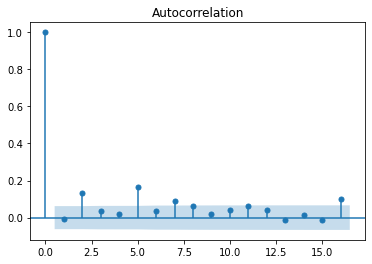

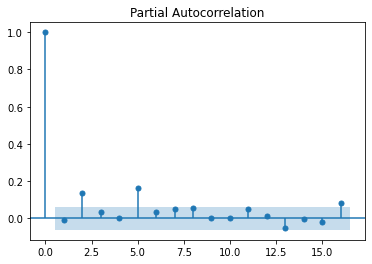

In [88]:
fig =tsaplots.plot_acf(std_resid**2,lags=16)
fig =tsaplots.plot_pacf(std_resid**2,lags=16)
plt.show()

$\textbf{Choosing the ARCH lags}$

In [89]:
#Running ARCH from p=1 to p =9
model_1 = arch_model(dt,mean ='Constant', vol ='ARCH', p=1)
model_2 = arch_model(dt,mean ='Constant', vol ='ARCH', p=2)
model_3 = arch_model(dt,mean ='Constant', vol ='ARCH', p=3)
model_4 = arch_model(dt,mean ='Constant', vol ='ARCH', p=4)
model_5 = arch_model(dt,mean ='Constant', vol ='ARCH', p=5)
model_6 = arch_model(dt,mean ='Constant', vol ='ARCH', p=6)
model_7 = arch_model(dt,mean ='Constant', vol ='ARCH', p=7)
model_8 = arch_model(dt,mean ='Constant', vol ='ARCH', p=8)
model_9 = arch_model(dt,mean ='Constant', vol ='ARCH', p=9)
x_1= model_1.fit(update_freq=0)
x_2= model_2.fit(update_freq=0)
x_3= model_3.fit(update_freq=0)
x_4= model_4.fit(update_freq=0)
x_5= model_5.fit(update_freq=0)
x_6= model_6.fit(update_freq=0)
x_7= model_7.fit(update_freq=0)
x_8= model_8.fit(update_freq=0)
x_9= model_9.fit(update_freq=0)


Optimization terminated successfully    (Exit mode 0)
            Current function value: 1664.047869085027
            Iterations: 5
            Function evaluations: 28
            Gradient evaluations: 5
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1651.3667967409056
            Iterations: 8
            Function evaluations: 49
            Gradient evaluations: 8
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1650.803109203952
            Iterations: 12
            Function evaluations: 83
            Gradient evaluations: 12
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1645.3224422301862
            Iterations: 13
            Function evaluations: 104
            Gradient evaluations: 13
Optimization terminated successfully    (Exit mode 0)
            Current function value: 1639.433689366865
            Iterations: 15
            Function evaluatio

In [90]:
#Computing the AIC  (AIC_stata= AIC_Python/ no of obs)
n = 993
aic=[x_1.aic/n,x_2.aic/n,x_3.aic/n,x_4.aic/n,x_5.aic/n,x_6.aic/n,x_7.aic/n,x_8.aic/n,x_9.aic/n]
bic= [x_1.bic/n,x_2.bic/n,x_3.bic/n,x_4.bic/n,x_5.bic/n,x_6.bic/n,x_7.bic/n,x_8.bic/n,x_9.bic/n]
name =['ARCH_1','ARCH_2','ARCH_3','ARCH_4','ARCH_5','ARCH_6','ARCH_7','ARCH_8','ARCH_9']
lzip(name,aic, bic)

[('ARCH_1', 3.357598930684848, 3.3724047635067365),
 ('ARCH_2', 3.334072098168994, 3.3538132085981793),
 ('ARCH_3', 3.3349508745296115, 3.359627262566093),
 ('ARCH_4', 3.325926369043678, 3.3555380346874557),
 ('ARCH_5', 3.316079938301843, 3.350626881552917),
 ('ARCH_6', 3.3162456742709248, 3.3557278951292946),
 ('ARCH_7', 3.31221412810576, 3.3566316265714264),
 ('ARCH_8', 3.305534275222518, 3.35488705129548),
 ('ARCH_9', 3.3073774117221526, 3.361665465402411)]

In [91]:
#Defining Conditional_Variance as squared conditional volatility from ARCH(5) which was defined as x_5 beforehand
conditional_variance = x_5.conditional_volatility**2

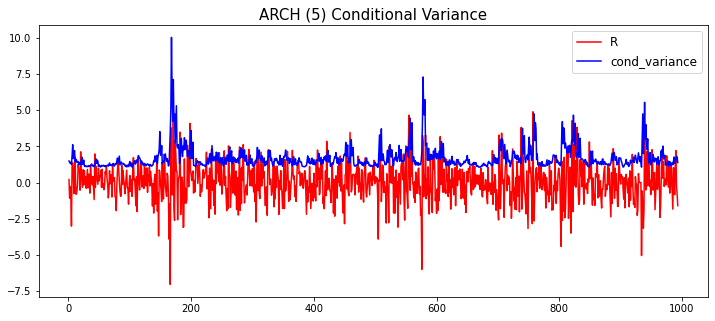

In [92]:
#Plotting the R and Conditional Variance from ARCH(5)
dt.plot(figsize=(12,5), color ='red',label ='R')
conditional_variance.plot(figsize=(12,5),color='blue',label='cond_variance')
plt.title('ARCH (5) Conditional Variance', size=15)
plt.legend(loc='best', fontsize='large')
plt.show()
